In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint

In [5]:
df = pd.read_csv(f"out/study/scores_df.csv")
df_f = df[df.pilot == 0]
df_f.head(60)

,id,version,sus,pretest,score,pilot
0,elephant,A,95.0,1.00,0.80,0.0
1,penguin,B,87.5,0.79,0.45,0.0
2,peacock,A,87.5,0.71,0.84,0.0
3,eagle,B,100.0,0.86,0.35,0.0
4,giraffe,A,90.0,0.79,0.67,0.0
5,hippo,B,75.0,0.79,0.51,0.0
6,rhino,A,70.0,0.79,0.51,0.0
11,capybara,B,90.0,0.79,0.59,0.0
12,hedgehog,A,75.0,0.79,0.73,0.0
13,lemur,B,50.0,0.71,0.59,0.0


In [30]:
a = df_f[df_f.version == "A"]
a = a[a.id != "rhino"]
b = df_f[df_f.version == "B"]
print(a["score"].mean(), a["score"].std(), b["score"].mean(), b["score"].std())

0.7366666666666667 0.06976149845485448 0.5099999999999999 0.09549869109050657


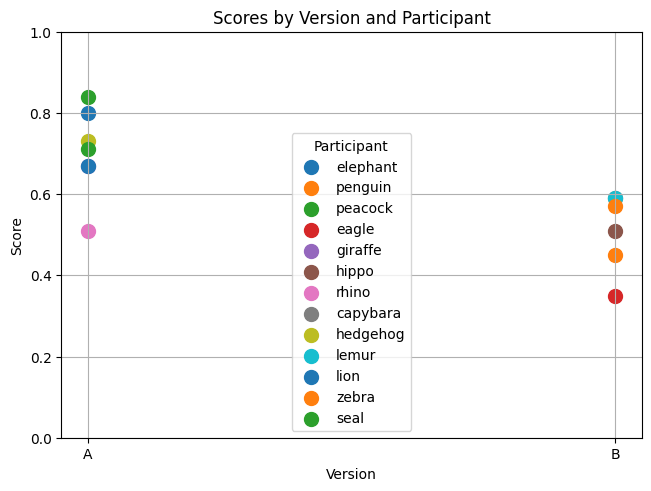

In [4]:
fig, ax = plt.subplots(layout='constrained')

# Loop through each participant and plot their scores
for participant in df_f['id'].unique():
    # Filter the DataFrame for the current participant
    participant_data = df_f[df_f['id'] == participant]
    
    # Plot the scores for this participant
    plt.scatter(participant_data['version'], participant_data['score'], label=participant, s=100)

# Add labels and title
ax.set_title('Scores by Version and Participant')
ax.set_xlabel('Version')
ax.set_ylabel('Score')
ax.set_ylim(0, 1)

# Show legend to differentiate participants
plt.legend(title='Participant')

# Show grid
plt.grid(True)

# Show the plot
plt.show()

In [54]:
plt.savefig(f'out/{participant}-correctness.png')

<Figure size 640x480 with 0 Axes>

In [69]:
df = pd.read_csv(f"out/study/combined3.csv")
df = df[(df["id"] != "rhino") & (df.pilot == 0) & (df["questionType"].notnull())]
df

,id,question,version,time_elapsed,proof,score,pilot,order,questionText,reasoning,cues,steps,reasonCorrect,understanding,misconception,questionType
15,elephant,qID-11,A,8.482,S1_IN1,1.0,0,1,Is there a mistake? [11],"found that proof established SSA and used SAS,...","inconsistency, tick marks, construction",step 4,right,geometric,NaN,1.0
16,elephant,qID-12,A,56.134,S1_IN1,1.0,0,1,Which step is wrong? [12],"looked through proof again, checked step 5 bef...","construction, tick marks, inconsistency","step 4, step 5",right,geometric,NaN,2.0
17,elephant,qID-13,A,31.333,S1_IN1,1.0,0,1,Describe reasoning [13],"add BD=BD reflexive, then use SAS",construction,step 4,right,geometric,NaN,3.0
18,elephant,qID-2,A,30.195,S1_IN1,1.0,0,1,conclude BA congruent to CB? [2],"not necessarily congruent, don't have same # o...","construction, tick marks",step 4,right,"geometric, direct lookup",NaN,4.0
19,elephant,qID-3,A,40.779,S1_IN1,1.0,0,1,conclude <DBA congruent to <BCD? [3],not same number of ticks,"construction, tick marks",step 4,right,"geometric, direct lookup",NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,seal,qID-11,A,67.111,S2_C2,3.0,0,7,Is there a mistake? [11],no mistake,"construction, all proof text",step 10,right,geometric,NaN,1.0
861,seal,qID-2,A,22.719,S2_C2,1.0,0,7,conclude <BAF congruent to <DCB? [2],"no, different ticks","construction, tick marks",step 1,right,"geometric, direct lookup",NaN,4.0
862,seal,qID-1,A,83.525,S2_C2,1.0,0,7,enough info...SAS Triangle Congruence (step 9)...,no not enough information,earlier proof steps (text),"step 9, step 7, step 8",right,geometric,NaN,5.0
865,seal,qID-11,A,3.027,S2_IN1,0.0,0,8,Is there a mistake? [11],"no mistake, saw red inconsistency but didn't u...","construction, inconsistency, all proof text","step 8, step 9",wrong,geometric,NaN,1.0


In [73]:
df_a = df[(df.version == "A")]
df_b = df[(df.version == "B")]

In [75]:
# calculate average score for each question type for a student

# Create a new DataFrame for rows where questionType == 1 and score == 3
# (student correctly answered that there is NO MISTAKE in a CORRECT proof)
special_rows = df[(df['questionType'] == 1) & (df['score'] == 3)].copy()

# Distribute the score across questionType 1, 2, and 3
distributed_rows = pd.concat([
    special_rows.assign(score=special_rows['score'] / 3, questionType=1),
    special_rows.assign(score=special_rows['score'] / 3, questionType=2),
    special_rows.assign(score=special_rows['score'] / 3, questionType=3)
])

# Remove the original rows where questionType == 1 and score == 3 from the main DataFrame
df = df[~((df['questionType'] == 1) & (df['score'] == 3))]

# Append the distributed rows to the main DataFrame
df = pd.concat([df, distributed_rows])

# Now group by 'id' and 'questionType', summing up the scores and copying the version
qscores = df.groupby(['id', 'questionType']).agg(
    points=('score', 'sum'),
    version=('version', 'first'), # Assuming 'version' is consistent for each 'id'
    time=('time_elapsed', 'mean')
).reset_index()

total_scores = {1: 8, 2: 8, 3: 8, 4: 7, 5: 7}
qscores['score'] = qscores.apply(lambda row: row['points'] / total_scores[row["questionType"]], axis=1)
qscores.to_csv("out/study/questionTypeData.csv")
qscores.head()

,id,questionType,points,version,time,score
0,capybara,1.0,4.0,B,25.908000,0.500000
1,capybara,2.0,4.0,B,15.797750,0.500000
2,capybara,3.0,3.0,B,15.923000,0.375000
3,capybara,4.0,5.0,B,34.117143,0.714286
4,capybara,5.0,6.0,B,35.866714,0.857143


In [74]:
# calculate average score and time taken for each question type
qdf = qscores.groupby(['questionType', 'version']).agg(
    points=('score', 'mean'),
    time=('time', 'mean')
).reset_index()
qdf

,questionType,version,points,time
0,1.0,A,0.854167,19.621292
1,1.0,B,0.416667,28.821042
2,2.0,A,0.770833,18.121211
3,2.0,B,0.333333,26.137486
4,3.0,A,0.604167,34.299451
5,3.0,B,0.229167,31.443503
6,4.0,A,0.809524,21.583357
7,4.0,B,0.666667,28.685833
8,5.0,A,0.857143,30.137143
9,5.0,B,0.785714,36.060290


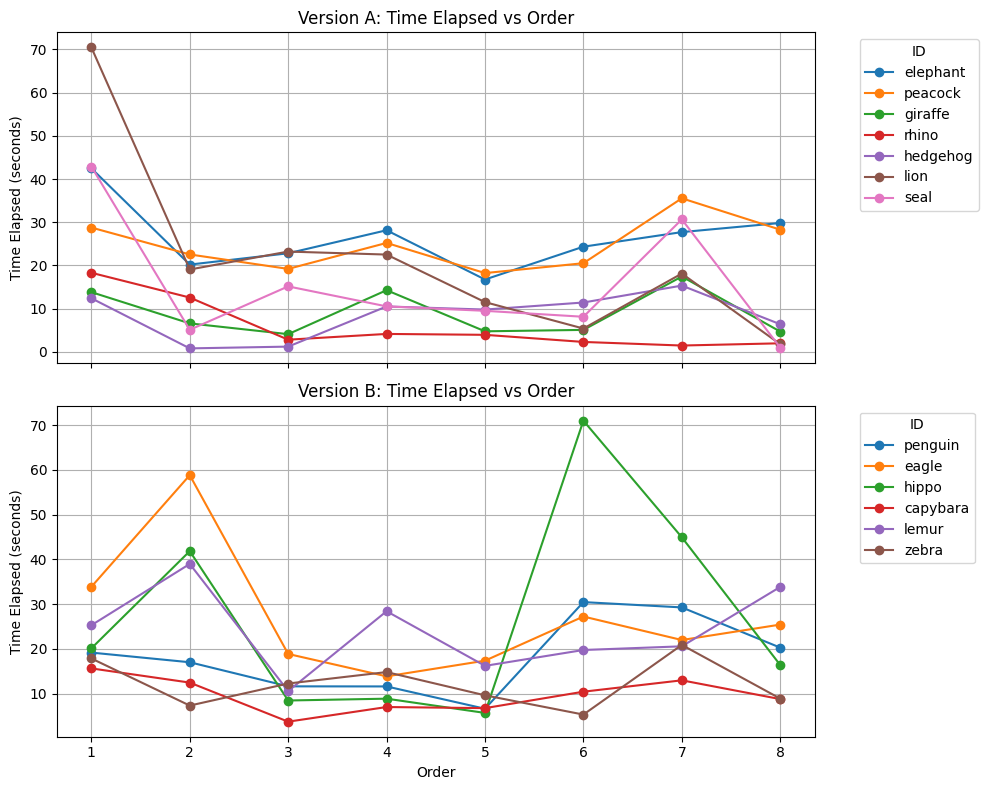

In [31]:
steps = {
    "S1_C1": 7,
    "S1_C2": 9,
    "S1_IN1": 5,
    "S1_IN2": 5,
    "S1_IN3": 6,
    "S2_C2": 10,
    "S2_IN1": 9,
    "S2_IN2": 8,
}

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Filter data for version A and version B
questions_to_include = ['qID-0']
df = df[df['question'].isin(questions_to_include)]

df_A = df[df['version'] == 'A']
df_B = df[df['version'] == 'B']

time_per_step = lambda df: df['time_elapsed'] / steps[df['proof'].values[0]]

# Plot for version A (Top subplot)
for participant in df_A['id'].unique():
    participant_data = df_A[df_A['id'] == participant]
    ax1.plot(participant_data['order'], time_per_step(participant_data), label=participant, marker='o')

ax1.set_title('Version A: Time Elapsed vs Order')
ax1.set_ylabel('Time Elapsed (seconds)')
ax1.legend(title='ID', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True)

# Plot for version B (Bottom subplot)
for participant in df_B['id'].unique():
    participant_data = df_B[df_B['id'] == participant]
    ax2.plot(participant_data['order'], time_per_step(participant_data), label=participant, marker='o')

ax2.set_title('Version B: Time Elapsed vs Order')
ax2.set_xlabel('Order')
ax2.set_ylabel('Time Elapsed (seconds)')
ax2.legend(title='ID', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

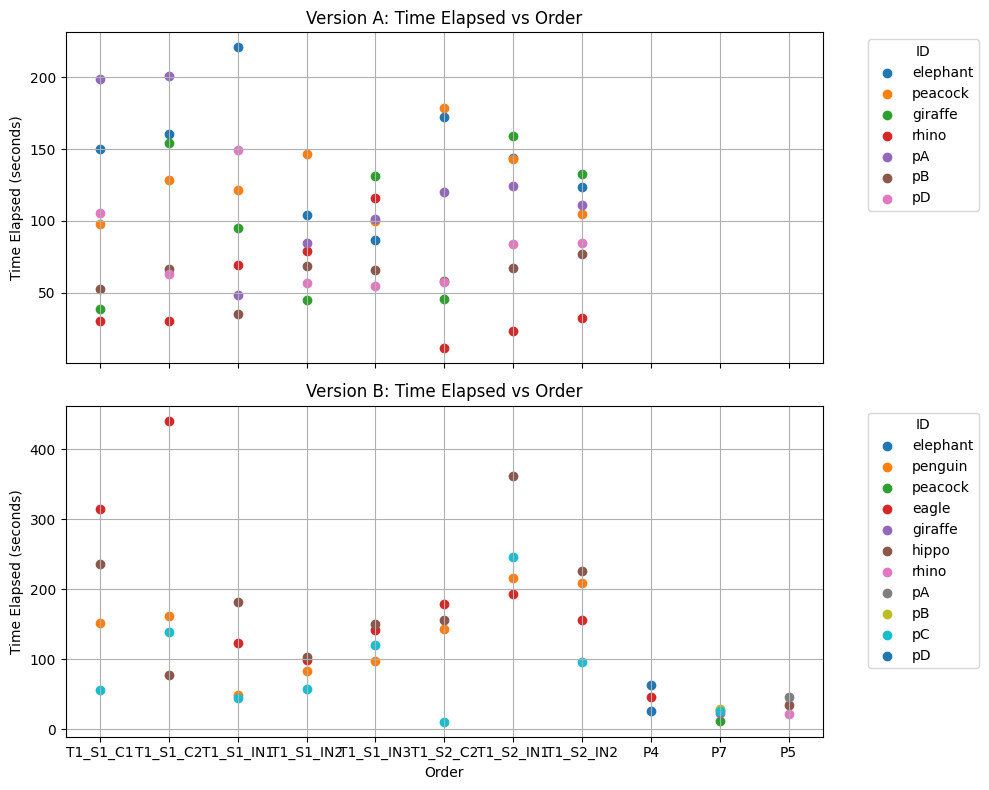

In [31]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

df_A = df[df['version'] == 'A']
df_B = df[df['version'] == 'B']

time_per_step = lambda df: df['time_elapsed'] / steps[df['proof'].values[0]]

def aggregate_time(df):
    questions_to_include = ['qID-0', 'qID-11']
    df = df[df['question'].isin(questions_to_include)]

    df_sum = df.groupby('proof', as_index=False).agg({'time_elapsed': 'sum', 'id': 'first', 'version': 'first'})
    return df_sum

# Plot for version A (Top subplot)
for participant in df_A['id'].unique():
    participant_data = df_A[df_A['id'] == participant]
    participant_data = aggregate_time(participant_data)
    ax1.scatter(participant_data['proof'], participant_data['time_elapsed'], label=participant, marker='o')

ax1.set_title('Version A: Time Elapsed vs Order')
ax1.set_ylabel('Time Elapsed (seconds)')
ax1.legend(title='ID', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True)

# Plot for version B (Bottom subplot)
for participant in df_B['id'].unique():
    participant_data = df_B[df_B['id'] == participant]
    participant_data = aggregate_time(participant_data)
    ax2.scatter(participant_data['proof'], participant_data['time_elapsed'], label=participant, marker='o')

ax2.set_title('Version B: Time Elapsed vs Order')
ax2.set_xlabel('Order')
ax2.set_ylabel('Time Elapsed (seconds)')
ax2.legend(title='ID', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [175]:
plt.savefig(f'out/{participant}-time.png')

<Figure size 640x480 with 0 Axes>

In [6]:
df = pd.read_csv("out/study/combined3.csv")
df

,id,question,version,time_elapsed,proof,score,pilot,order,questionText,reasoning,cues,steps,reasonCorrect,understanding,misconception,questionType
0,elephant,qID-2,B,82.740,P1,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,elephant,qID-3,B,10.533,P1,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,elephant,qID-1,B,9.354,P1,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,elephant,qID-3,B,8.984,P2,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,elephant,qID-2,B,8.384,P2,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,seal,qID-1,A,83.525,S2_C2,1.0,0,7,enough info...SAS Triangle Congruence (step 9)...,no not enough information,earlier proof steps (text),"step 9, step 7, step 8",right,geometric,NaN,5.0
863,seal,qID-0,A,153.276,S2_C2,1.0,0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864,seal,qID-0,A,4.959,S2_IN1,1.0,0,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
865,seal,qID-11,A,3.027,S2_IN1,0.0,0,8,Is there a mistake? [11],"no mistake, saw red inconsistency but didn't u...","construction, inconsistency, all proof text","step 8, step 9",wrong,geometric,NaN,1.0


In [7]:
# Check times where student got question right with the wrong reason
df = df[(df["pilot"] == 0) & (~df["proof"].str.startswith("P"))]
select = df[(df["score"] > 0) & (df["reasonCorrect"] == 0) & (df["question"] != "qID-0")]
select

,id,question,version,time_elapsed,proof,score,pilot,order,questionText,reasoning,cues,steps,reasonCorrect,understanding,misconception,questionType


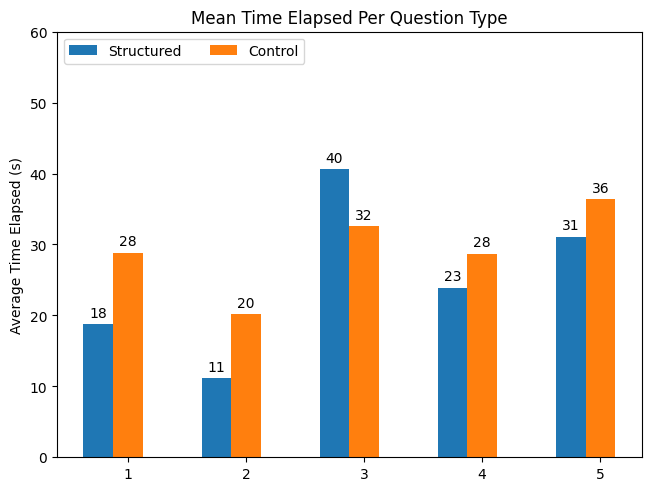

In [29]:
# for each question type (1, 2, 3, 4, 5)
d = {"Structured": [], "Control": []}
question_types = [x + 1 for x in range(5)]
for qtype in question_types:
    dfq = df[df["questionType"] == qtype]
    a = dfq[dfq["version"] == "A"]
    b = dfq[dfq["version"] == "B"]
    d["Structured"].append(a["time_elapsed"].mean())
    d["Control"].append(b["time_elapsed"].mean())

x = np.arange(len(question_types))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in d.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, labels=[int(e) for e in measurement], padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Time Elapsed (s)')
ax.set_title('Mean Time Elapsed Per Question Type')
ax.set_xticks(x + width, question_types)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 60)

plt.show()
# average the time elapsed
# split by condition
# plot 5 sets of bars for each condition